<a href="https://colab.research.google.com/github/s408440153/bmi-predict/blob/main/bmi_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
## For preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_squared_error
## 我們所使用的Machine Learning Algorithm
from sklearn.linear_model import LinearRegression,SGDRegressor
from xgboost import XGBRegressor
## For Evaluation Model
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('./bmi_data.csv')

In [ ]:
data.describe()

,Age,Height(Inches),Weight(Pounds),BMI
count,25000.000000,24981.000000,24984.000000,24950.000000
mean,26.499600,67.992968,127.078208,19.321368
std,5.190379,1.901481,11.663043,1.552091
min,18.000000,60.278360,78.014760,13.070879
25%,22.000000,66.704930,119.307775,18.278339
50%,27.000000,67.995920,127.156700,19.302160
75%,31.000000,69.272370,134.894050,20.357547
max,35.000000,75.152800,170.924000,26.023756


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


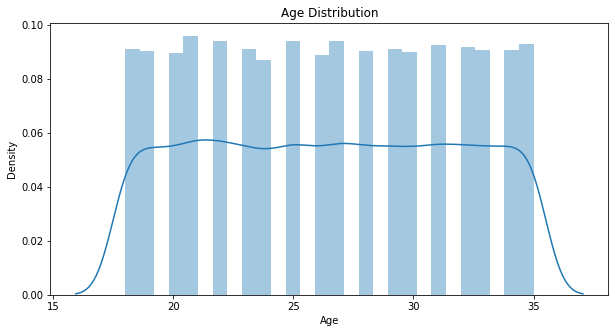

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(data['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


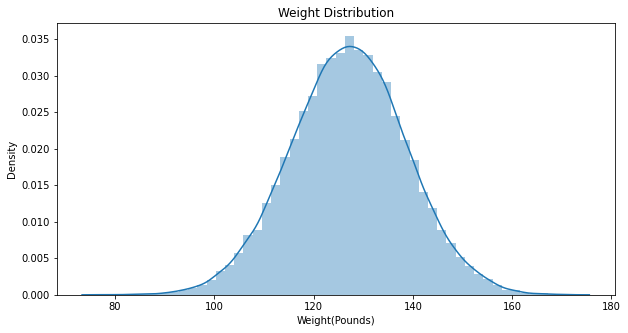

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Weight Distribution')
sns.distplot(data['Weight(Pounds)'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


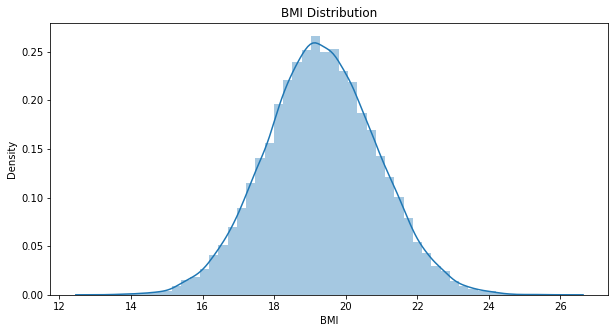

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(data['BMI'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


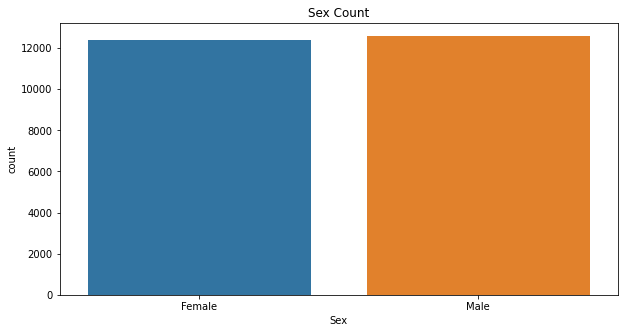

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Sex'])
plt.title('Sex Count')
plt.show()

In [ ]:
#將Sex資料取出並刪除該columns
sex = data[['Sex']]
data.drop(columns='Sex', axis=1, inplace=True)

In [ ]:
#將data中有空缺的值進行中位數插補
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
Data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# Sex變成無序型的類別型資料
OneHot = OneHotEncoder(sparse=False)
SEX = pd.DataFrame(OneHot.fit_transform(sex), columns=OneHot.get_feature_names_out())


In [ ]:
# 將BMI資料取出並刪除該columns
target = Data['BMI']
Data.drop(columns='BMI', axis=1, inplace=True)

In [ ]:
# 把最後的data做標準化
scale = StandardScaler()
scaleData = pd.DataFrame(scale.fit_transform(Data), columns=Data.columns)

#把SEX,scaleData的所有資料分成train和test
newData = pd.concat([SEX, scaleData], axis=1)
train_data,test_data,train_target,test_target\
        =train_test_split(newData, target, test_size=0.3, random_state=42)


In [ ]:
#使用XGboost，並判斷正確度
XGB = XGBRegressor(verbosity=0)
XGB.fit(train_data, train_target)

XGBRegressor(verbosity=0)

In [ ]:
#將資料分成五組並做交叉驗證
xgb_cv = cross_val_score(XGB, newData, target, cv=5)
print('Cross validation scores: ', xgb_cv)
print('Cross validation mean: ', np.mean(xgb_cv))

#預測testdata的prediction並和test_target做比較
prediction = XGB.predict(test_data)
print('predict score: ',r2_score(test_target, prediction))

Cross validation scores:  [0.99733137 0.99756482 0.99742449 0.99610164 0.98968233]
Cross validation mean:  0.9956209317053762
predict score:  0.9964306964475258


Text(0.5, 1.0, 'XGBRegressor')

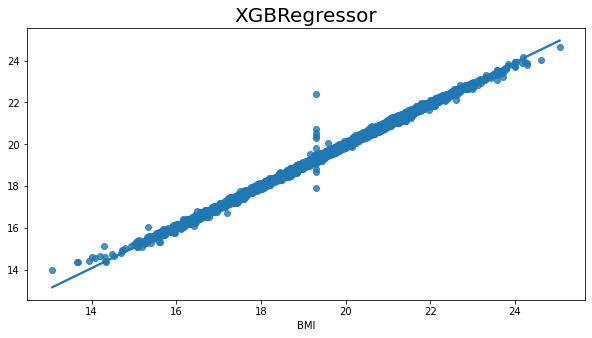

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x=test_target,y=prediction)
plt.title('XGBRegressor', fontsize = 20)

In [ ]:
# linner Regression
df = pd.read_csv('./bmi_data.csv')

In [ ]:
mean_Height = df[['Sex','Height(Inches)']].groupby('Sex').mean()
Height_mapping = dict(zip(mean_Height.index, mean_Height['Height(Inches)']))
for i in range(len(df['Height(Inches)'].isnull())):
    if df['Height(Inches)'].isnull()[i]:
        df.loc[i,'Height(Inches)'] = Height_mapping.get(df['Sex'][i])

mean_Weight = df[['Sex','Weight(Pounds)']].groupby('Sex').mean()
Weight_mapping = dict(zip(mean_Weight.index, mean_Weight['Weight(Pounds)']))
for i in range(len(df['Weight(Pounds)'].isnull())):
    if df['Weight(Pounds)'].isnull()[i]:
        df.loc[i,'Weight(Pounds)'] = Weight_mapping.get(df['Sex'][i])
mean_BMI = df[['Sex','BMI']].groupby('Sex').mean()
BMI_mapping = dict(zip(mean_BMI.index, mean_BMI['BMI']))
for i in range(len(df['BMI'].isnull())):
    if df['BMI'].isnull()[i]:
        df.loc[i,'BMI'] = BMI_mapping.get(df['Sex'][i])

In [ ]:
#把性別變成有序標籤
sex_en = LabelEncoder()
df['Sex'] = sex_en.fit_transform(df['Sex'].values)

In [ ]:
#將資料分成data和target
data = df.values[::,0:4]
target = df.values[::,4]

In [ ]:
#將data和target隨機分割成test和train 
train_data,test_data,train_target,test_target\
    =train_test_split(data,target,test_size=0.25,random_state=13)

In [ ]:
#標準化
std_traindata = StandardScaler().fit_transform(train_data)
std_testdata = StandardScaler().fit_transform(test_data)
std_traintarget = StandardScaler().fit_transform(train_target.reshape(-1,1))
std_testtarget = StandardScaler().fit_transform(test_target.reshape(-1,1))

In [ ]:
#建立線性預測模組，並判斷正確度
LR = LinearRegression()
LR.fit(std_traindata, std_traintarget)
print("the value of default measurement of linear regression"
                    ,LR.score(std_traindata,std_traintarget))

the value of default measurement of linear regression 0.994401234448245


In [ ]:
#線性預測traindata和testdata並和traintarget以及testtarget做比較
train_pred = LR.predict(std_traindata)
test_pred = LR.predict(std_testdata)
print("MSE train:%6f,test:%6f" %(mean_squared_error(std_traintarget,train_pred)
                                ,mean_squared_error(std_testtarget,test_pred)))

MSE train:0.005599,test:0.003798


Text(0.5, 1.0, 'linner Regression')

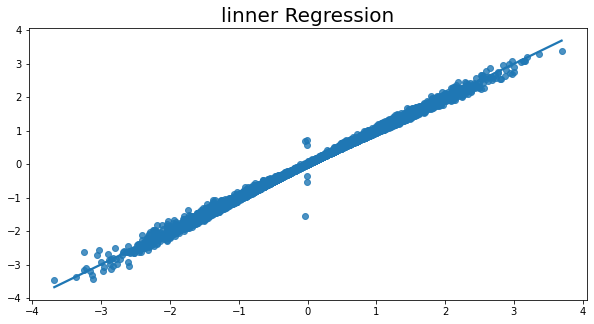

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x=std_testtarget,y=test_pred)
plt.title('linner Regression', fontsize = 20)